In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords
from pandas import json_normalize
import seaborn as sns
import nltk

#nltk.download('stopwords')

# Load the dataset (assuming JSON format)
#data = pd.read_json('sample-dog-food.json')

try:
    # Attempt to load the JSON as a dictionary
    with open('transformed-dog-food.json', 'r') as file:
        data = pd.read_json('transformed-dog-food.json', orient='records')  # Use `records` for a list of dictionaries
        #print(data.head())
except ValueError as e:
    print(f"ValueError: {e}")

#print(data.head())


In [2]:
reviews = data.copy()

# Define the function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

reviews['sentiment'] = reviews['review_text'].apply(analyze_sentiment)

print(reviews.head())

               id       date               author_name  \
0  R37JFWCJHWZB6M 2021-04-17               Instakk.amz   
1  R3BP13JLW5QAHN 2021-04-16              Kristen Tapp   
2   R22PDRLEW40B8 2021-04-16                 Latoya B.   
3  R1UUP8NOWV3XCC 2021-04-15  Houseplants & Yoga Pants   
4  R1V5GUEOGQQ5TY 2021-04-14               Danny Zheng   

                                          author_url  rating  \
0  https://www.amazon.com/gp/profile/amzn1.accoun...       5   
1  https://www.amazon.com/gp/profile/amzn1.accoun...       5   
2  https://www.amazon.com/gp/profile/amzn1.accoun...       5   
3  https://www.amazon.com/gp/profile/amzn1.accoun...       2   
4  https://www.amazon.com/gp/profile/amzn1.accoun...       1   

                            review_title  \
0                     Best dog food ever   
1                  Dog and mom approved.   
2                         Dogs love it!!   
3  💩 🤮 💩  Icky taste, RUNNY POOPS  💩 🤮 💩   
4                           Dissatisfied   

 

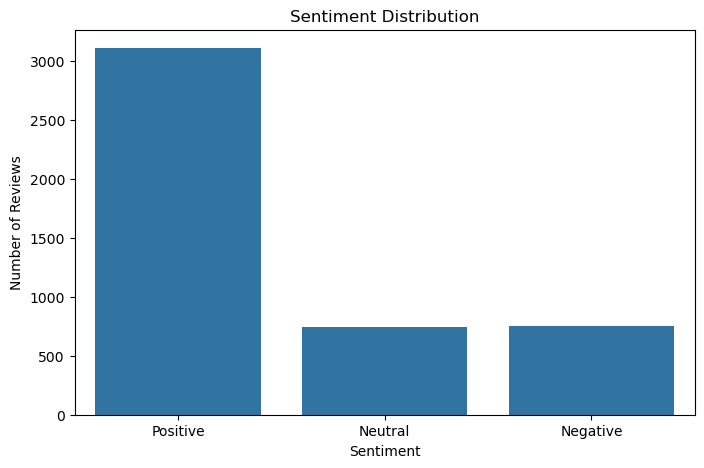

In [3]:

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews, x='sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

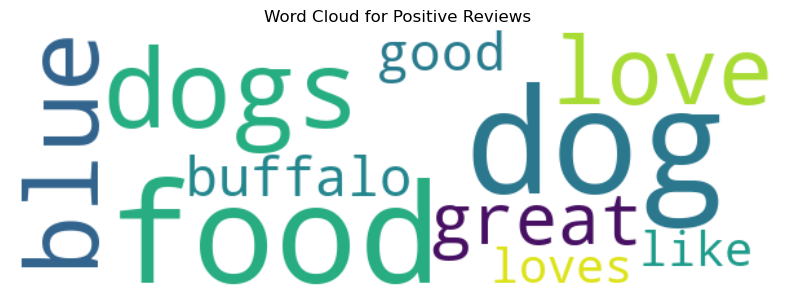

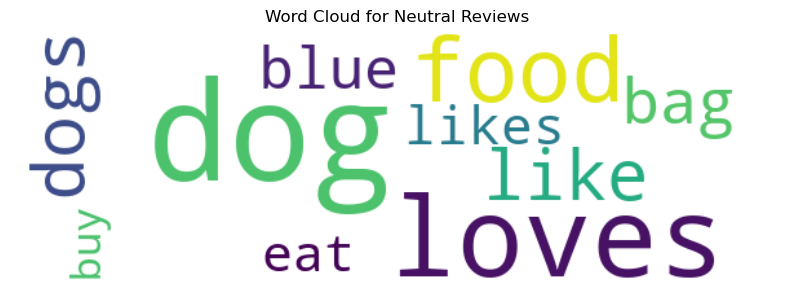

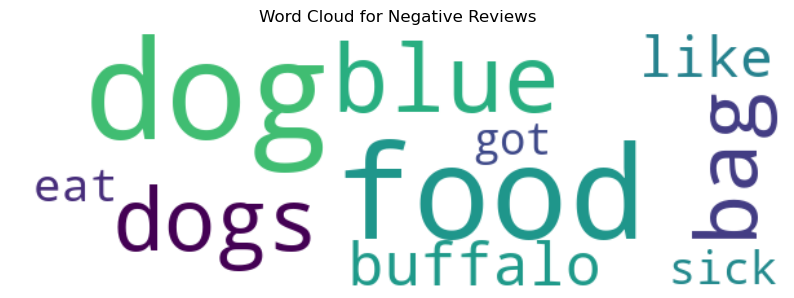

In [4]:

# Word Analysis for Each Sentiment
stop_words = set(stopwords.words('english'))

def extract_common_words(df, sentiment):
    words = ' '.join(df[df['sentiment'] == sentiment]['review_text']).lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(words).most_common(10)

positive_words = extract_common_words(reviews, 'Positive')
neutral_words = extract_common_words(reviews, 'Neutral')
negative_words = extract_common_words(reviews, 'Negative')

# Word Cloud for Each Sentiment
for sentiment, words in zip(['Positive', 'Neutral', 'Negative'], [positive_words, neutral_words, negative_words]):
    wordcloud = WordCloud(width=600, height=200, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

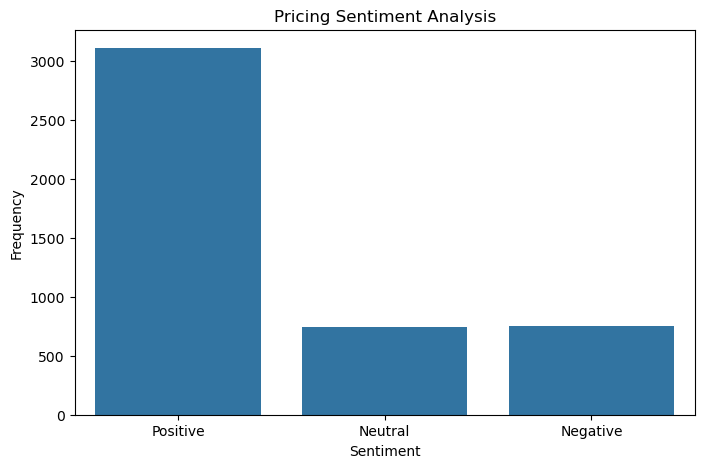

In [5]:


# Brand Loyalty and Tentative Customer Analysis
def extract_loyal_tentative_words():
    loyal_reviews = reviews[reviews['sentiment'] == 'Positive']
    tentative_reviews = reviews[reviews['sentiment'] == 'Negative']

    loyal_words = extract_common_words(loyal_reviews, 'Positive')
    tentative_words = extract_common_words(tentative_reviews, 'Negative')

    return loyal_words, tentative_words

loyal_words, tentative_words = extract_loyal_tentative_words()

# Pricing Analysis vs Sentiment
pricing_sentiment = reviews.groupby('sentiment').size()
plt.figure(figsize=(8, 5))
sns.barplot(x=pricing_sentiment.index, y=pricing_sentiment.values, order=['Positive', 'Neutral', 'Negative'])
plt.title('Pricing Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [7]:


# Insights and Conclusions
print("Insights and Conclusions:\n")
print("1. Positive reviews emphasize quality and reliability.")
print("2. Negative reviews highlight packaging, health issues, and delivery concerns.")
print("3. Pricing perception varies with sentiment; loyal customers focus on value while tentative ones cite cost issues.")
print("Recommendations:\n")
print("- Focus on improving packaging quality.")
print("- Address specific health-related concerns via clear labeling.")
print("- Highlight the value proposition and benefits in marketing materials.")


Insights and Conclusions:

1. Positive reviews emphasize quality and reliability.
2. Negative reviews highlight packaging, health issues, and delivery concerns.
3. Pricing perception varies with sentiment; loyal customers focus on value while tentative ones cite cost issues.
Recommendations:

- Focus on improving packaging quality.
- Address specific health-related concerns via clear labeling.
- Highlight the value proposition and benefits in marketing materials.


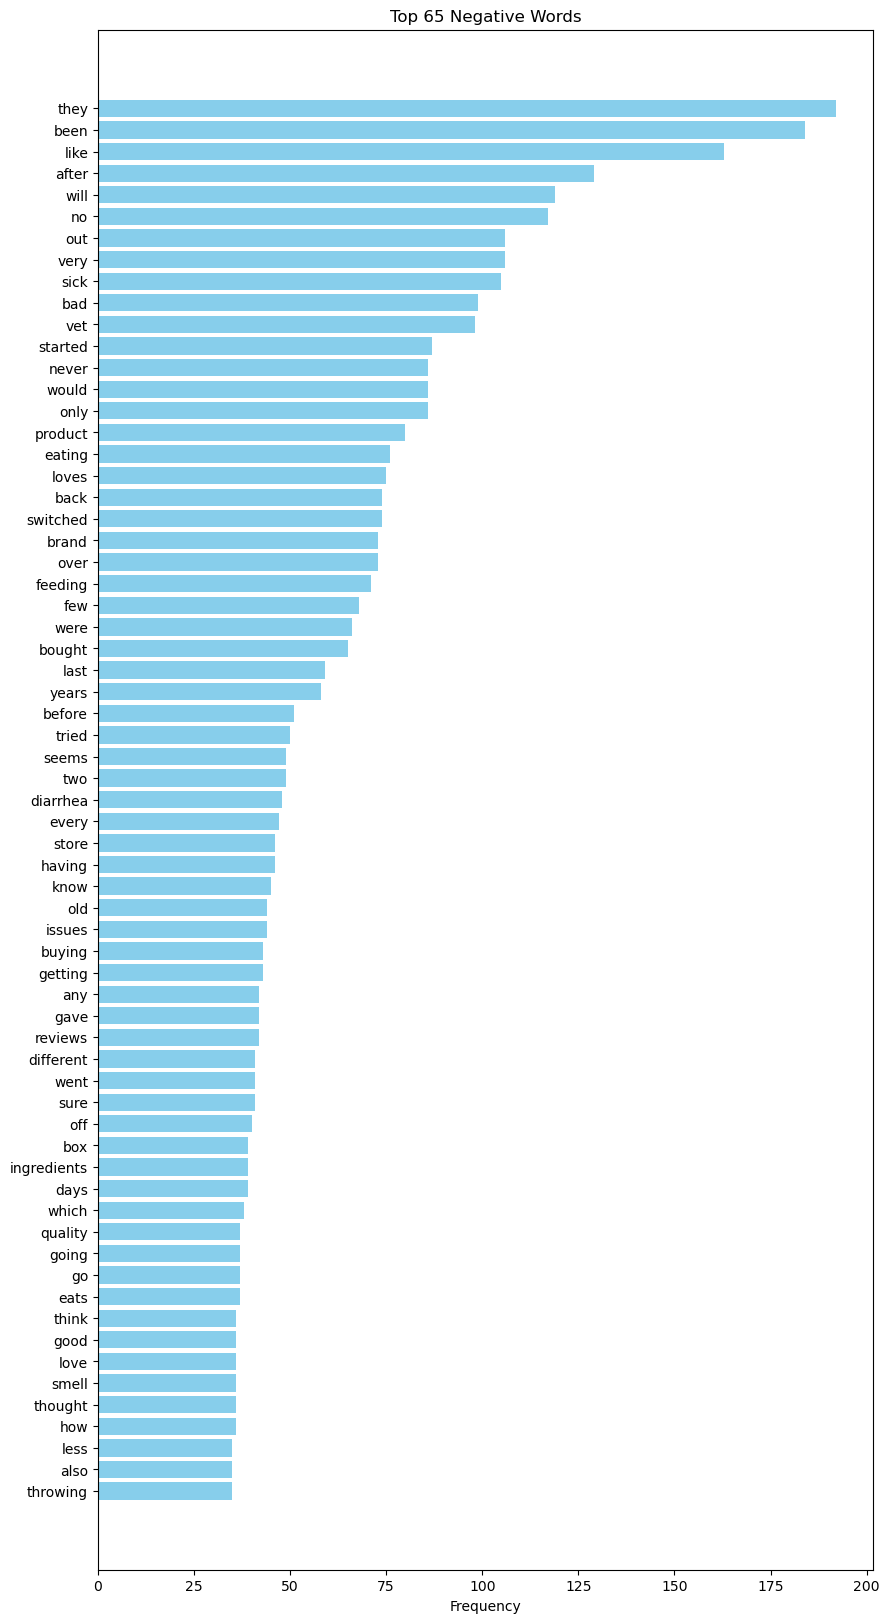

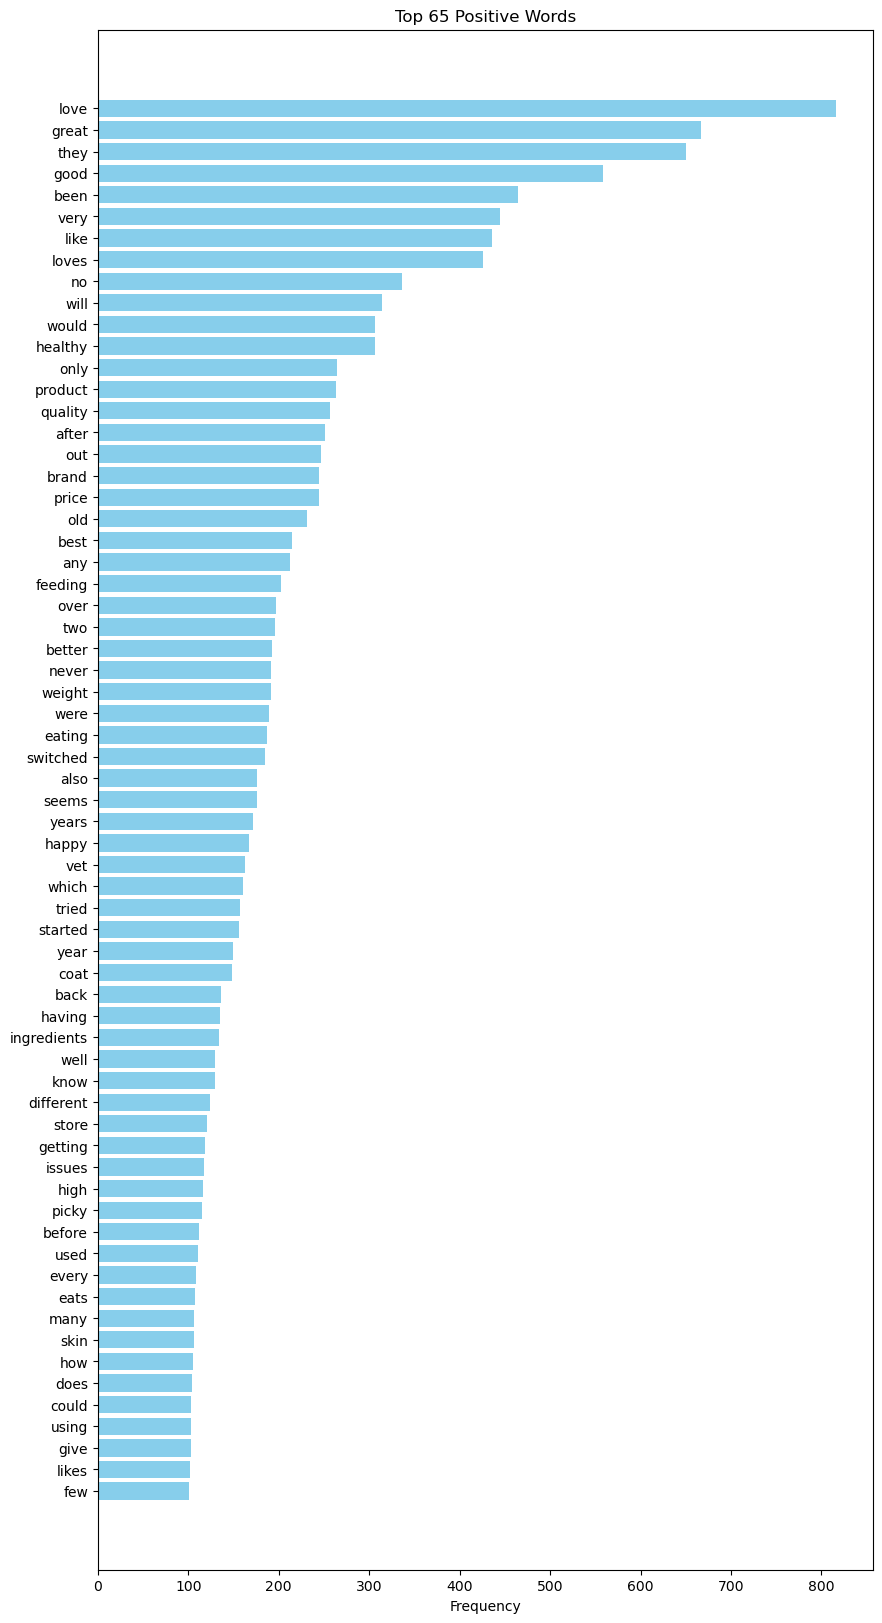

In [31]:
from collections import Counter
import matplotlib.pyplot as plt

# Predefined stopwords list
stop_words = set(["product", "not", "but", "had", "bag",
    "eat", "amazon", "their", "just", "me", "even", "small", "pet",
    "there", "read", "day", "both", "more", "really", "got", "something", 
    "then", "did", "first", "am", "feed", "some", "since", "because", "up", "get", "little",
    "do", "dry", "all", "when", "other", "chicken","buy", "made", "if", "him", "now", "you", "same", "to", "time", "was","than", "can", "always", "much", "them",
    "have","has", "so", "be", "about", "my", "dog", "food", "dogs", "she","our","his","he", "we", "her", "one", "what","your",
    "i", "a", "an", "the", "blue", "buffalo", "are", "and", "is", "it", "to", "of", "this", "for", "in", "on", "with", "that", "at", "as", "by", "or", "from"])

# Function to extract top N words
def get_top_words(df, sentiment, top_n=25):
    words = ' '.join(df[df['sentiment'] == sentiment]['review_text']).lower().split()
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(filtered_words).most_common(top_n)

# Generate top 25 words for positive and negative sentiments
positive_words = get_top_words(reviews, 'Positive', 65)
negative_words = get_top_words(reviews, 'Negative', 65)

# Function to plot word frequency
def plot_top_words(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 20))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()  # Reverse order for horizontal bars
    plt.show()

# Plot top 65 negative words
plot_top_words(negative_words, 'Top 65 Negative Words')

# Plot top 65 positive words
plot_top_words(positive_words, 'Top 65 Positive Words')

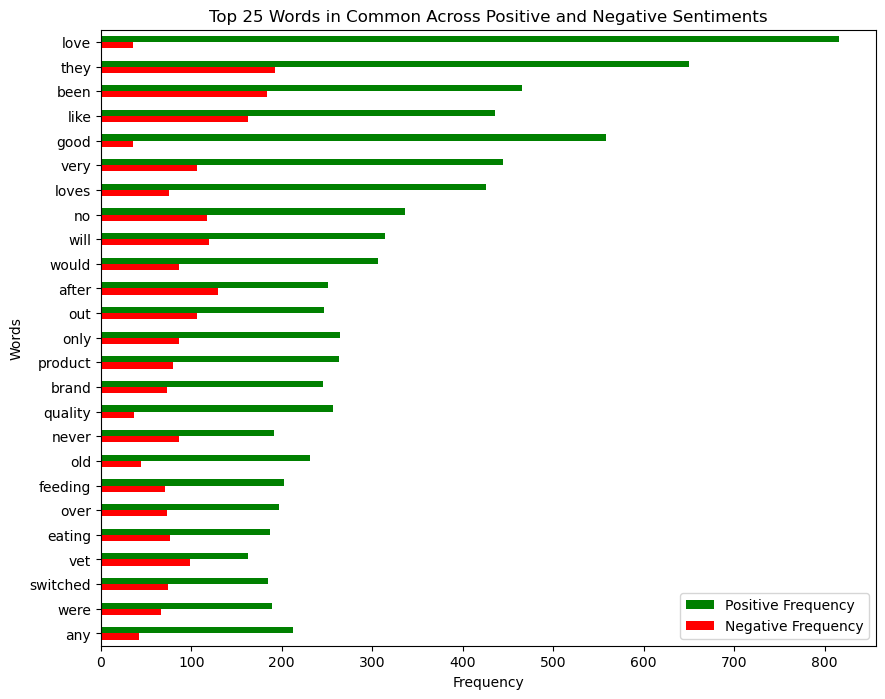

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Function to find common words and their frequencies
def find_common_words(pos_words, neg_words):
    # Convert to dictionaries for easier lookup
    pos_dict = dict(pos_words)
    neg_dict = dict(neg_words)
    
    # Find common words
    common_words = set(pos_dict.keys()) & set(neg_dict.keys())
    
    # Create a list of tuples: (word, positive_freq, negative_freq)
    common_word_frequencies = [(word, pos_dict[word], neg_dict[word]) for word in common_words]
    
    # Sort by the sum of frequencies (descending)
    return sorted(common_word_frequencies, key=lambda x: x[1] + x[2], reverse=True)

# Find common words
common_words = find_common_words(positive_words, negative_words)

# Convert to a DataFrame for easier handling
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Positive Frequency', 'Negative Frequency'])

# Plot the common words
def plot_common_words(df, title):
    df = df.head(25)  # Show top 25 common words
    df.plot(kind='barh', x='Word', figsize=(10, 8), stacked=False, color=['green', 'red'])
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.gca().invert_yaxis()  # Reverse order for horizontal bars
    plt.show()

# Plot the top 25 common words with their frequencies
plot_common_words(common_words_df, 'Top 25 Words in Common Across Positive and Negative Sentiments')


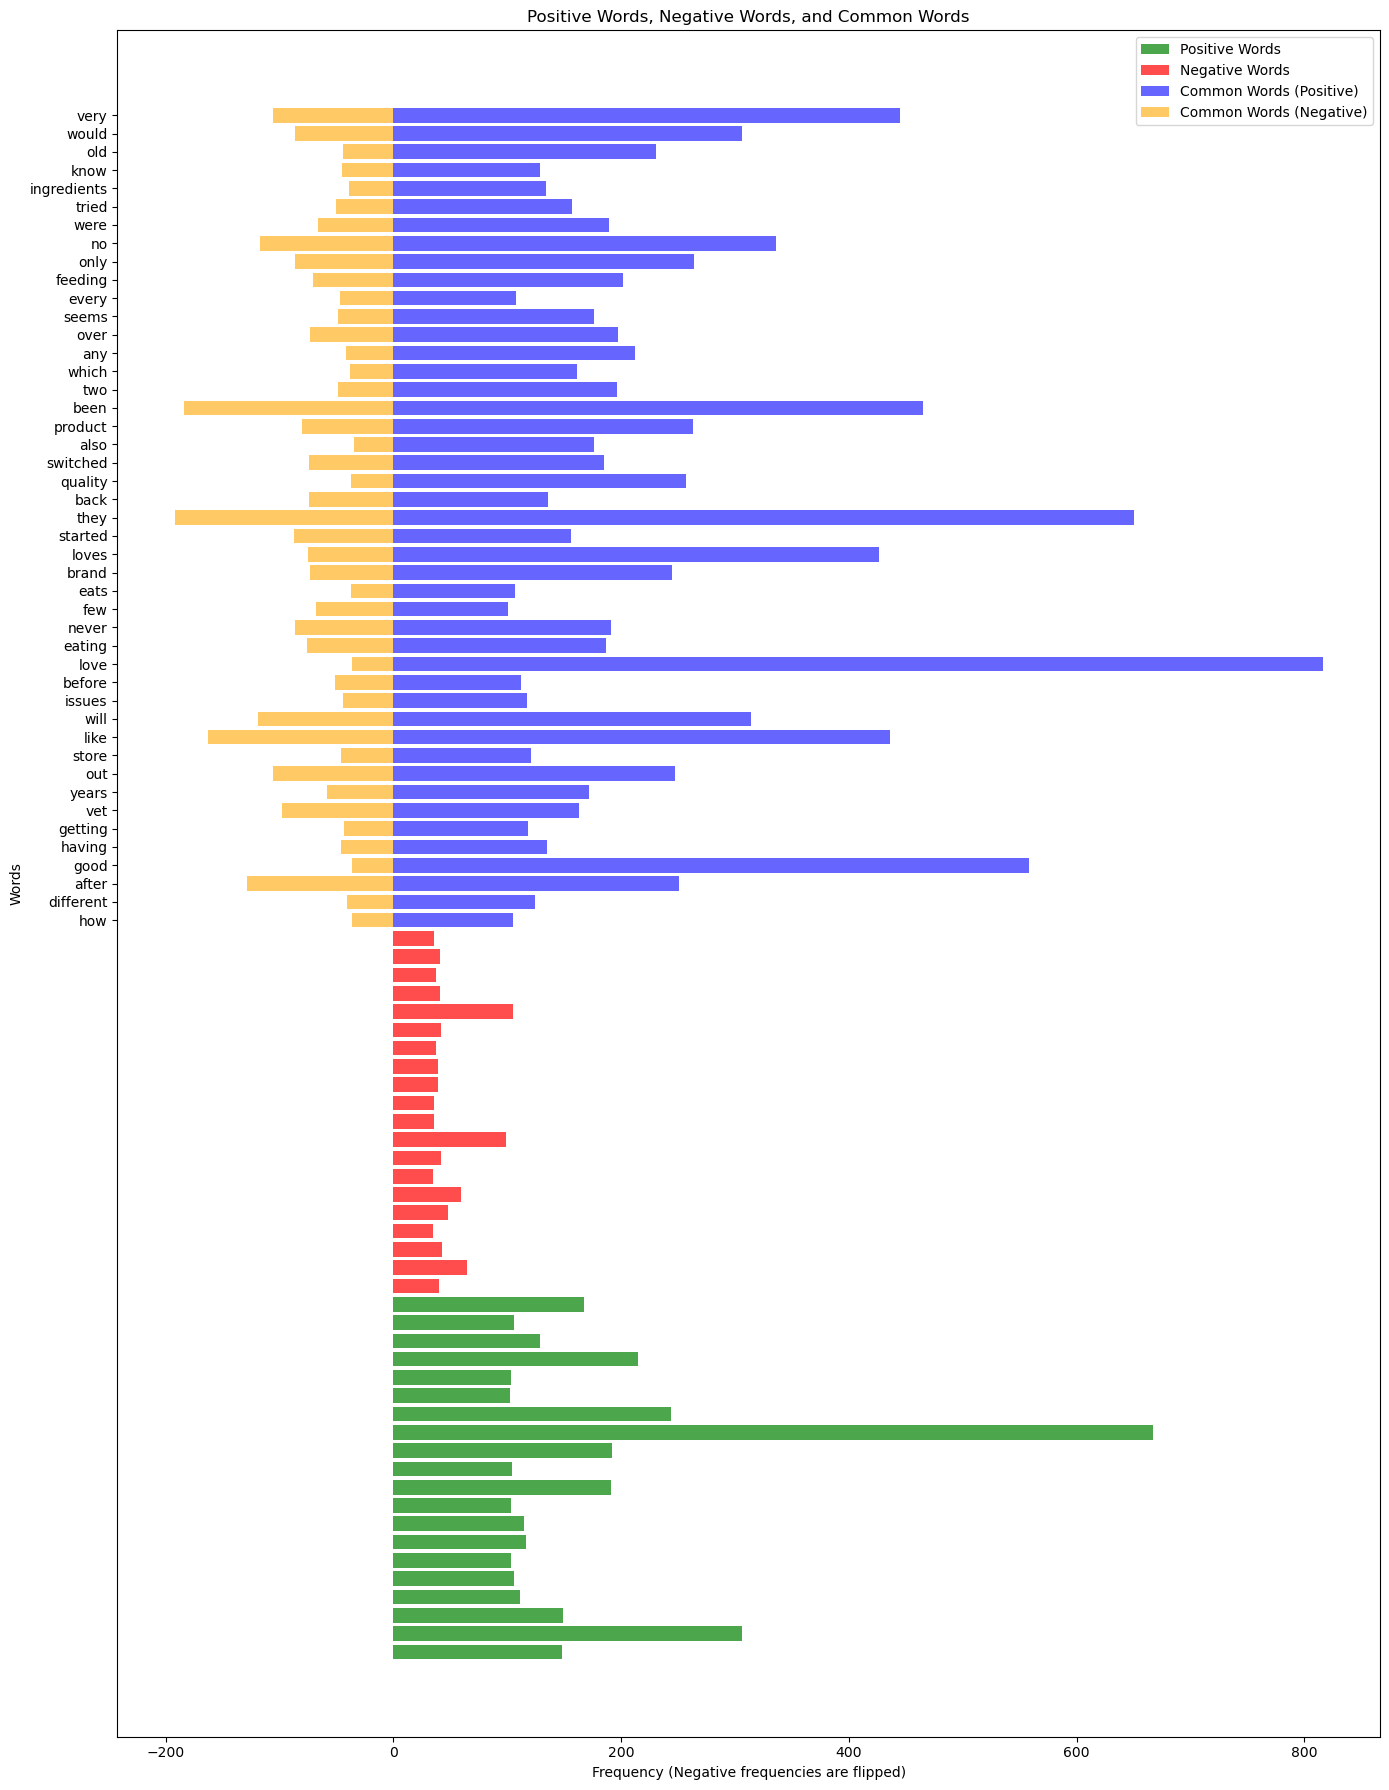

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

# Combine positive, negative, and common word frequencies into a single DataFrame
def prepare_combined_dataframe(pos_words, neg_words):
    pos_dict = dict(pos_words)
    neg_dict = dict(neg_words)
    
    # Find common words
    common_words = set(pos_dict.keys()) & set(neg_dict.keys())
    
    # Create a unified DataFrame
    words = list(pos_dict.keys()) + list(neg_dict.keys())
    words = list(set(words))  # Remove duplicates
    df = pd.DataFrame(words, columns=['Word'])
    df['Positive Frequency'] = df['Word'].map(pos_dict).fillna(0)
    df['Negative Frequency'] = df['Word'].map(neg_dict).fillna(0)
    df['Is Common'] = df['Word'].apply(lambda x: x in common_words)
    return df

# Prepare the combined DataFrame
combined_df = prepare_combined_dataframe(positive_words, negative_words)

# Plot the combined chart
def plot_combined_chart(df):
    # Separate data for plotting
    common_df = df[df['Is Common']]
    pos_df = df[(~df['Is Common']) & (df['Positive Frequency'] > 0)]
    neg_df = df[(~df['Is Common']) & (df['Negative Frequency'] > 0)]
    
    # Prepare bar positions
    pos_y = np.arange(len(pos_df))
    neg_y = np.arange(len(neg_df))
    common_y = np.arange(len(common_df))
    
    fig, ax = plt.subplots(figsize=(14, 18))
    
    # Positive words
    ax.barh(pos_y, pos_df['Positive Frequency'], color='green', label='Positive Words', alpha=0.7)
    ax.set_yticks(pos_y)
    ax.set_yticklabels(pos_df['Word'])
    
    # Negative words
    ax.barh(neg_y + len(pos_df), neg_df['Negative Frequency'], color='red', label='Negative Words', alpha=0.7)
    ax.set_yticks(neg_y + len(pos_df))
    ax.set_yticklabels(neg_df['Word'])
    
    # Common words
    ax.barh(common_y + len(pos_df) + len(neg_df), common_df['Positive Frequency'], color='blue', alpha=0.6, label='Common Words (Positive)')
    ax.barh(common_y + len(pos_df) + len(neg_df), -common_df['Negative Frequency'], color='orange', alpha=0.6, label='Common Words (Negative)')
    ax.set_yticks(common_y + len(pos_df) + len(neg_df))
    ax.set_yticklabels(common_df['Word'])
    
    # Add labels
    ax.set_xlabel('Frequency (Negative frequencies are flipped)')
    ax.set_ylabel('Words')
    ax.set_title('Positive Words, Negative Words, and Common Words')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the combined chart
plot_combined_chart(combined_df)
